# Exercise 1 - Basic plotting

Python has a few different packages for basic plotting. The most commonly used one is [matplotlib](https://matplotlib.org/). With this package you can make a large variety of plots, from a simple timeseries plot to a 3D plot. In this exercise we will start with the very basics of making a plot. 

## Basics of matplotlib figure
To create a plot you first need a figure to put the data in. This can be set up using a [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) from [matplotlib pyplot](https://matplotlib.org/users/pyplot_tutorial.html). Consider this figure as a canvas to make plots on. There are a few configurations to adjust the figure, such as size (keyword = figsize) and background color (facecolor). On this figure you can create your own plot. A very simple example is shown below where a timeseries with three data points are plotted ((1,3), (2, 2) and (3, 3)).

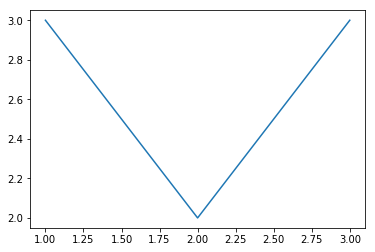

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
fig = plt.figure()

x = [1, 2, 3]
y = [3, 2, 3]
plt.plot(x, y)

That's how easy you can make a plot. However because of the order of the arguments for this function, we can make it even easier. Because in this case the x values are a range from 1 to 3, we only need to supply the y data to make this function work properly.


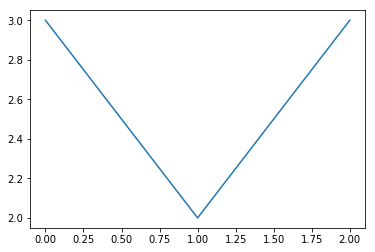

In [2]:
fig = plt.figure()
plt.plot(y)

When the plot function only receives 1 argument it automatically makes a range for the x axis to plot the y values to. This was a simple timeseries. However sometimes you have data points that need to be plotted. That can be done with the same function, however some adjusments for styling are needed. To see what are all the options of the plot function you can type 'plt.plot?'

In [3]:
plt.plot?

You can plot multiple plots on to the same figure, with different styling. Notice that the plot function automatically styles the plots for you in a specific order if you don't give any styling options. This you might have noticed from the first two examples, where both lines are blue. Each time you start a new figure, the order of the plots styling is reset. Furthermore it is important to always define a new figure before plotting. Otherwise you might be ending up changing a figure defined in another cell. 

Next is a bit more complex figure with three different plots, demonstrating the basics of plotting.

Text(0.5, 0.98, 'and this is the suptitle')

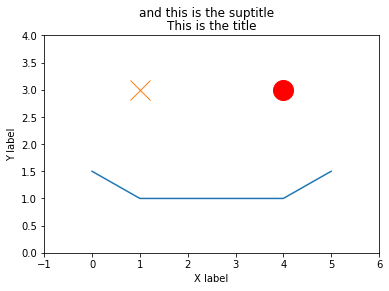

In [4]:
plt.figure()
# Make the line for the mouth -> we only use values for the y axis
plt.plot([1.5, 1, 1, 1, 1, 1.5])
# Make the eyes, when using only 1 data point, you need to set a marker, otherwise you won't see the plot appear
plt.plot([1], [3], 'x', ms="20")
# The plot function will automatically give a different color a new plot added to a figure. But we can set the color ourselfs
plt.plot([4], [3], 'o', color="red", ms="20")

# We can adjust the axes to get the plots better in view
plt.ylim(0, 4)
plt.xlim(-1, 6)

# Setting some additional information to the plot
plt.xlabel('X label')
plt.ylabel('Y label')
plt.title('This is the title')
plt.suptitle('and this is the suptitle')

## Exercise 1.1 Creating a timeseries

Using pandas, read in a csv file and create a timeseries of earthquakes from 1970 to 2014

The data can be found here: 
https://data.humdata.org/dataset/catalog-of-earthquakes1970-2014/resource/10ac8776-5141-494b-b3cd-bf7764b2f964

Plot the magnitude values per earthquake as a function of the number of earthquakes (we are not going in to date time axes just yet, this will be considered in exercise 2). And style it to your liking. Consider things like changing the figure size, this might help if the data is too large and therefore too cramped in the normal figure size.

In [5]:
import pandas as pd

data = pd.read_csv('../data/earthquakes1970-2014.csv')
data.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,1970/01/04 17:00:40.20,24.139,102.503,31.0,7.5,Ms,90.0,NaN,NaN,0.0,NEI,1.970010e+09
1,1970/01/06 05:35:51.80,-9.628,151.458,8.0,6.2,Ms,85.0,NaN,NaN,0.0,NEI,1.970011e+09
2,1970/01/08 17:12:39.10,-34.741,178.568,179.0,6.1,Mb,59.0,NaN,NaN,0.0,NEI,1.970011e+09
3,1970/01/10 12:07:08.60,6.825,126.737,73.0,6.1,Mb,91.0,NaN,NaN,0.0,NEI,1.970011e+09
4,1970/01/16 08:05:39.00,60.280,-152.660,85.0,6.0,ML,0.0,NaN,NaN,NaN,AK,NaN


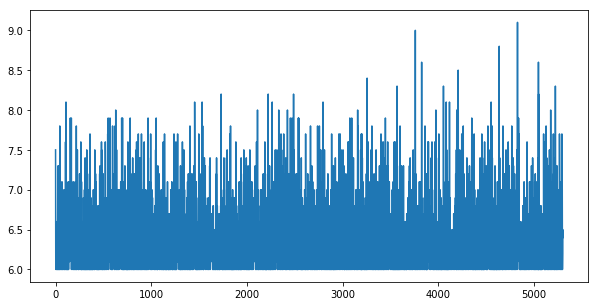

In [6]:
y = data.Magnitude.values
plt.figure(figsize=(10, 5))
plt.plot(y)

## Exercise 1.2 Drawing a threshold
On the Richter magnitude scale from 7 up an earthquake is considered as "heavy". Using the same data as in Exercise 1.1, recreate te plot and draw all points lower than 7 in yellow and all earthquakes heavier than 7 with red. Create a horizontal line on the graph indicating this threshhold.

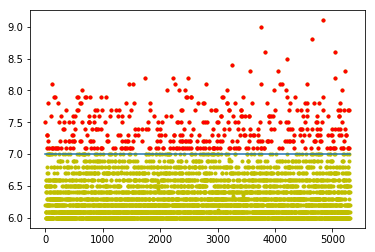

In [7]:
import numpy as np
plt.figure()
x = np.arange(len(y))
plt.plot(x[y>3], y[y>3], 'y.')
plt.plot(x[y>7], y[y>7], 'r.')
plt.plot(x[[0, -1]], [7, 7])

There is an easier way to plot a horizontal line than the plot function. Matplotlibs pyplot has the function [axhline](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axhline.html)  and [axvline](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html) (horizontal and vertical lines) for this specific goal. These are just two other functions that can be used to plot on a matplotlib figure. There are many more to make life easier. 

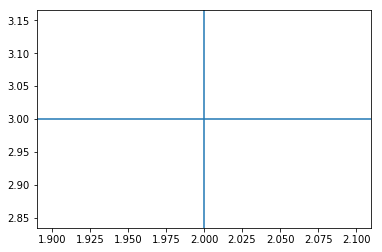

In [8]:
plt.figure()
plt.axvline(2)
plt.axhline(3)

A simple example is the hist function. We are going to reuse the data from the earthquakes. Those timeseries were a bit messy, but with a histogram plot we can gain some more information from the data. 

(array([3.721e+03, 1.050e+03, 5.020e+02, 2.900e+01, 2.000e+00]), array([ 6. ,  6.5,  7. ,  8. ,  9. , 10. ]), <a list of 5 Patch objects>)


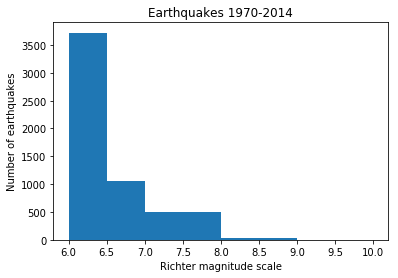

In [9]:
y = data.Magnitude.values
plt.figure()
hist = plt.hist(y, [6, 6.5, 7, 8, 9, 10])
plt.title('Earthquakes 1970-2014')
plt.xlabel('Richter magnitude scale')
plt.ylabel('Number of earthquakes')
print(hist)

## Exercise 1.3  Create a pie chart
Using the values of the histogram plot, create a [pie](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pie.html) chart. This means you need to search the website to see how to get the values from the hist plot and how to use them in a pie chart. 
The wedges of the pie should contain the amount of  data inside different categories on the Richter scale. (6-6.4, 6.5-6.9, 7-7.9, 8-8.9 and 9-9.9). In this way more information can be displayed on the graph that could be useful.

Also try to create a pie chart of which one of the wedges is popping out of the pie. You could use the explode argument to do this.

By using the plt.legend() function you can add a legend to the pie chart.

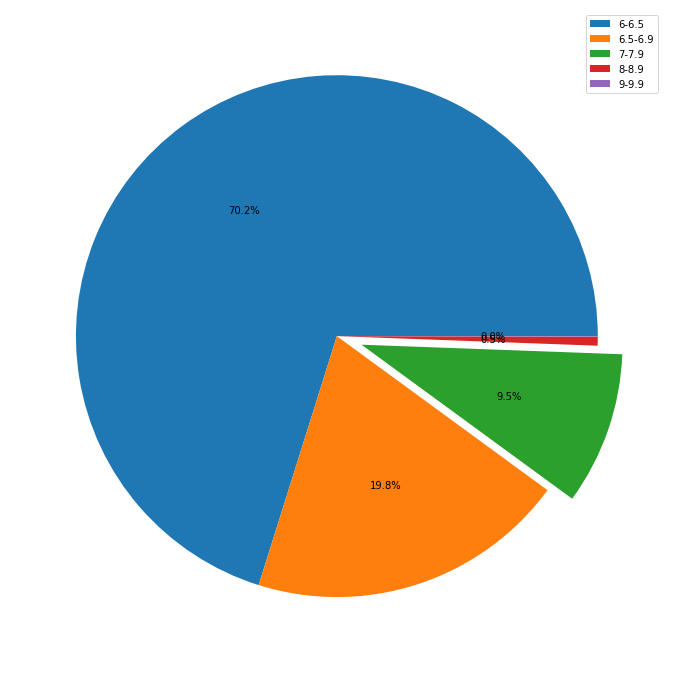

In [10]:
fig = plt.figure(figsize=(12, 12))

explode = (0, 0, 0.1, 0, 0)  # explode 1st slice

# Assigning the labels
labels = ['6-6.5', '6.5-6.9', '7-7.9', '8-8.9', '9-9.9']

# Getting the histogram information
hist = plt.hist(y, [6, 6.5, 7, 8, 9, 10])

# Writing output to pie
patches, texts, pct = plt.pie(hist[0], explode=explode, autopct='%1.1f%%')

plt.legend(patches, labels, loc="best")

## Creating box plots
Another way to plot data is by the use of boxplots. These can give a visual overview of the statistics of the dataset.
To create a box plot the [plt.boxplot()](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) of matplotlib can be used. Based on the dimensions of the input it will generate one or multiple boxplots. In the example below we have taken the following steps to show the earthquake data in a series of box plots:

1. Define the figure, using the figure() function
2. Creating subsets of the dataset with the [np.logical_and()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html) function. 
    **NOTE** that for this would could also have used <code>np.where((y>6) & (y<6.5))</code>
3. Combine all the subsets in a list
4. Define the labels for each of the subsets
5. Create the box plot, using the [plt.boxplot()](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) function
6. Add the grid, using the [plt.grid()](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.grid.html) function

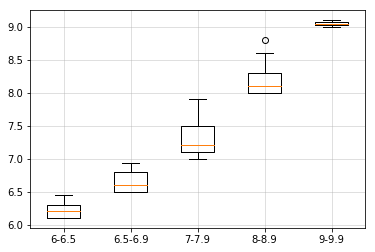

In [13]:
# Define the figure
fig = plt.figure()

# Create the subsets
y1 = y[np.logical_and(y > 6, y < 6.5)]
y2 = y[np.logical_and(y >= 6.5, y < 7)]
y3 = y[np.logical_and(y >= 7, y < 8)]
y4 = y[np.logical_and(y >= 8, y < 9)]
y5 = y[np.logical_and(y >= 9, y < 10)]

# Combine all the subsets in a list
y_box = [y1, y2, y3, y4, y5]


#Another way of doing this is by using a loop: 
# ranges = [6, 6.5, 7, 8, 9, 10]
# y_box = []
# for i in range(len(ranges) - 1):
#     y_box.append( y[np.logical_and(y > ranges[i], y < ranges[i + 1])])

# Define the labels for each of the subsets
labels = ['6-6.5', '6.5-6.9', '7-7.9', '8-8.9', '9-9.9']

# Create the box plot
res = plt.boxplot(y_box, labels=labels)

# Add the grid
plt.grid(which='major', alpha=0.5)

## Plotting gridded data

There are various ways of plotting gridded data. The most convenient methods are:
<ul>
    <li><a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html">imshow</a></li>
    <li><a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pcolor.html">pcolor</a></li>
    <li><a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pcolormesh.html">pcolormesh</a></li>
</ul>

In this exercise we will introduce you to the <code>imshow()</code> function. First we will show an example of how the function works, after that you can try yourself to plot data from a pre-defined function.

Note that the definition of the figure is slightly different as we need the axis (<code>ax</code>) to plot the colorbar. Before we used the <code>plt.figure()</code> function, now we use the <code>plt.subplots()</code> function. At the moment this is used without any arguments.

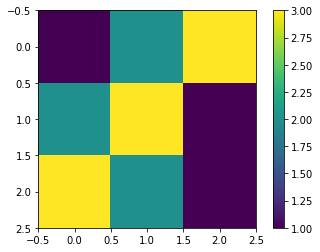

In [14]:
# Create dummy data
z = [[1, 2, 3],
     [2, 3, 1],
     [3, 2, 1]]

# Define the figure
fig, ax = plt.subplots()

# Create the plot
im = ax.imshow(z)

# Create the colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

## Exercise 1.5
this first example was relatively simple. Now create your own plot for the data that was created by the function provided below. The X and Y are used to determine the Z, the Z is the data that should be shown using the imshow() function.

1. First start by plotting the data just as in the previous example
2. Secondly have a look at the [interpolation options](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html) and pick one you like
3. Add your own colormap from the selection at: [Colormaps reference](https://matplotlib.org/3.1.0/gallery/color/colormap_reference.html)
4. Note that the axis are still the amount of items, instead of the x and y values. Use the extent argument to set the extent of the plot
5. You can also set the maximum and minimum values for the colorbar using the vmin and vmax arguments

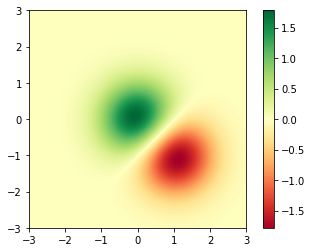

In [15]:
# Function definition
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Creating the figure
fig, ax = plt.subplots()

# Adding the plot, now with more arguments
# interpolation
# cmap: for adding the colors
# Setting the extent
# using vmin and vmax to set the min and max of the colorbar

im = ax.imshow(Z,
               interpolation='bilinear',
               cmap=cm.RdYlGn,
               extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max()
              )

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

plt.show()

## Adding subplots
To add a subplot you have to give the nrows and ncols arguments in the the <code>plt.subplots()</code> function. By default both are 1, and to provide arguments note that the first is the number of rows, and the second is number of columns. 

<code>plt.subplots(1, 2)</code> would yield a figure with two subplots next to each other. The function returns the figure object and a list of axes. 

In this exercise do the following:
1. Create a figure consisting of two subplots, make sure to define two axes!
2. Copy the imshow call of the previous exercise and put this on the first axis
3. Copy the imshow call of the example and put this on the second axis
4. Now add two colorbars, one for each axis

OPTIONAL: Use the shrink and fraction arguments to resize the colorbars.

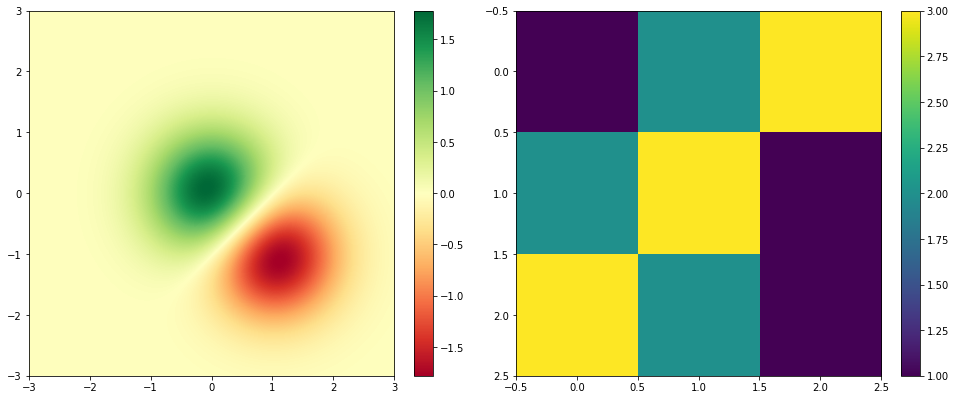

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

im1 = ax1.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
                 extent=[-3, 3, -3, 3],
                 vmax=abs(Z).max(), vmin=-abs(Z).max())

im2 = ax2.imshow(z)

# Using the shrink and fraction arguments to resize the colorbars
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, shrink=0.84)
cbar2 = fig.colorbar(im2, ax=ax2, fraction=0.05, shrink=0.84)

plt.show()

## Creating a contour plot
In this exercise you will use the [plt.contour()](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.contour.html) function. We will use the same function as was used in the previous exercise.

The important thing for contour plots is the definition of the levels, which can be done by defining a range of values. For this the numpy function [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) is very useful. It requires the following input: <code>np.arange(low, high, step)</code>, for example <code>np.arange(-2, 2, 0.2)</code> would show contour lines from -2 to 2 for every step of 0.2 within the range.

In [ ]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='nearest', cmap=cm.RdYlGn,
               extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

# Defining the levels using the np.arange function
levels = np.arange(-1.6, 1.6, 0.2)

# Plotting the contour plot, note that for imshow the default for origin is 'upper', while for contour it is 'lower'
CS = ax.contour(Z, levels, cmap=cm.RdYlGn, origin='upper',
                linewidths=2, extent=(-3, 3, -3, 3))

cbar = ax.figure.colorbar(im, ax=ax)

plt.show()